In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow_datasets as tfds

In [0]:
import statistics

In [0]:
dataset=pd.read_csv("news_csv.csv")

FileNotFoundError: ignored

In [0]:
dataset['label']=dataset['label'].map({"FAKE":0,"REAL":1})

In [0]:
dataset.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,1


### **Change frac to vary the size of training set**

In [0]:
train=dataset.sample(frac=0.7)
test=dataset.drop(train.index)


In [0]:
train_label=train.pop('label')

In [0]:
test_label=test.pop('label')

In [0]:
max_length_text=int(statistics.mean([len(a) for a in train['text']]))

In [0]:
max_length_text

4718

### **Change Vocabulary Size here**


In [0]:
vocab_size=10000

In [0]:
tk1=tfds.features.text.SubwordTextEncoder.build_from_corpus(train['text'],vocab_size,max_subword_length=5)

In [0]:
trainx=train['text'].tolist()
for i,sen in enumerate(trainx):
  trainx[i]=tk1.encode(sen)


In [0]:
testx=test['text'].tolist()
for i,sen in enumerate(testx):
  testx[i]=tk1.encode(sen)


In [0]:
seq_train_text=pad_sequences(trainx,maxlen=max_length_text,truncating="post",padding="post")

In [0]:
seq_test_text=pad_sequences(testx,maxlen=max_length_text,truncating="post",padding="post")

In [0]:
train_label=np.array(train_label)
test_label=np.array(test_label)

In [0]:
cb1=tf.keras.callbacks.ModelCheckpoint("abc.h5",save_best_only=True)
cb2=tf.keras.callbacks.EarlyStopping(patience=2)

In [0]:
#@title Using Convolution layers
model=tf.keras.Sequential()        
model.add(tf.keras.layers.Embedding(vocab_size,64,input_length=max_length_text))
dil=[1,2,4,8,16,32]
for dilation_rate in dil:
  model.add(tf.keras.layers.Conv1D(64,5,dilation_rate=dilation_rate,padding="causal",activation=tf.nn.relu))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32,activation="relu"))
model.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid))
model.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

In [0]:
#@title Using LSTM Cells
model2=tf.keras.layers.Sequential()
model2.add(tf.keras.layers.Embedding(vocab_size,64,input_length=max_length_text))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)))
model2.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model2.add(tf.keras.layers.Dense(32,activation="relu"))
model2.add(tf.keras.layers.Dense(1,activation=tf.nn.sigmoid))
model2.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(1e-4),metrics=['accuracy'])

In [0]:
history=model.fit(seq_train_text,train_label,epochs=10,validation_data=(seq_test_text,test_label))

Epoch 1/10
139/139 [==============================] - 11s 78ms/step - loss: 0.6779 - accuracy: 0.5582 - val_loss: 0.6673 - val_accuracy: 0.6302
Epoch 2/10
139/139 [==============================] - 11s 76ms/step - loss: 0.5193 - accuracy: 0.7914 - val_loss: 0.4223 - val_accuracy: 0.9316
Epoch 3/10
139/139 [==============================] - 11s 76ms/step - loss: 0.3880 - accuracy: 0.9355 - val_loss: 0.3993 - val_accuracy: 0.9542
Epoch 4/10
139/139 [==============================] - 11s 76ms/step - loss: 0.3710 - accuracy: 0.9488 - val_loss: 0.3938 - val_accuracy: 0.9427
Epoch 5/10
139/139 [==============================] - 11s 77ms/step - loss: 0.3584 - accuracy: 0.9601 - val_loss: 0.3816 - val_accuracy: 0.9653
Epoch 6/10
139/139 [==============================] - 11s 77ms/step - loss: 0.3413 - accuracy: 0.9777 - val_loss: 0.3708 - val_accuracy: 0.9737
Epoch 7/10
139/139 [==============================] - 11s 76ms/step - loss: 0.3334 - accuracy: 0.9844 - val_loss: 0.3765 - val_accuracy:

In [0]:
history2=model2.fit(seq_train_text,train_label,epochs=15,validation_data=(seq_test_text,test_label),callbacks=[cb1,cb2])

In [0]:
loss,accu=model.evaluate(seq_test_text,test_label)
print("Accuracy is {} and Loss is {}".format(accu,loss))

60/60 [==============================] - 1s 25ms/step - loss: 0.3681 - accuracy: 0.9763
Accuracy is 0.9763282537460327 and Loss is 0.3681168854236603


In [0]:
loss2,accu2=model2.evaluate(seq_test_text,test_label)
print("Accuracy is {} and Loss is {}".format(accu2,loss2))

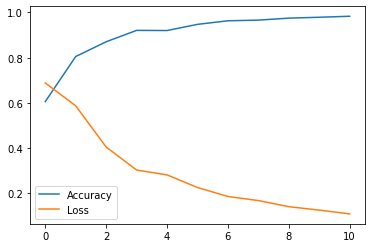

In [0]:
plt.plot(history.history['accuracy'],label="Accuracy")
plt.plot(history2.history['accuracy'],label="Accuracy2")
plt.legend()

In [0]:
plt.plot(history.history['loss'],label="Loss")
plt.plot(history2.history["loss"],label="Loss2")
plt.legend()

In [0]:
prediction=model.predict(seq_test_text)

In [0]:
classes=["Fake","Real"]

## **Change number of predictions here**

In [0]:
for i in range(100):
  if(int(np.round(prediction[i][0]))==test_label[i]):
    k="Correct"
  else:
    k="Incorrect"
  print("Prediction = {} :: Actual = {} :: Prediction is {}".format(classes[int(np.round(prediction[i][0]))],classes[test_label[i]],k))

Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Real :: Actual = Real :: Prediction is Correct
Prediction = Real :: Actual = Real :: Prediction is Correct
Prediction = Real :: Actual = Real :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Real :: Actual = Real :: Prediction is Correct
Prediction = Real :: Actual = Real :: Prediction is Correct
Prediction = Real :: Actual = Real :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Real :: Actual = Real :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Fake :: Actual = Fake :: Prediction is Correct
Prediction = Real :: Actual = Real :: Pr